#01 Árboles de clasificación con scklearn

Tipo de algoritmo de aprendizaje supervisado que se basa en realizar particiones a partir de distintos niveles de las variables disponibles.




## 0101 Import
Importamos todas las librerías necesarias para este análisis: pandas, numpy, seaborn, matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree

## 0102 Carga el dataset de accidentes cardiacos
Para probar a hacer árboles de decisión utilizaremos un dataset sobre accidentes coronarios que he encontrado en Kaggle ([aquí](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)).


**Podéis encontrar el archivo listo para importar en mi github: 'https://github.com/abelmmg/TheValley_AI/blob/main/heart_failure_clinical_records_dataset.csv.**

Importa este dataset en un dataframe llamado **df**.

Descripción de columnas:
* anaemia: Decrease of red blood cells or hemoglobin (boolean)
* creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
* diabetes: If the patient has diabetes (boolean)
* ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
* high_blood_pressure: If the patient has hypertension (boolean)
* platelets: Platelets in the blood (kiloplatelets/mL)
* serum_creatinine: Level of serum creatinine in the blood (mg/dL)
* serum_sodium: Level of serum sodium in the blood (mEq/L)
* sex: Woman or man (binary)



In [3]:
# URL al dataset

url = ("https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/heart_failure_clinical_records_dataset.csv")

# Importar csv
df = pd.read_csv(url)

# Visualización

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df_resumen = df[['age', 'anaemia', 'serum_creatinine', 'DEATH_EVENT']]
df_resumen


,age,anaemia,serum_creatinine,DEATH_EVENT
0,75.0,0,1.9,1
1,55.0,0,1.1,1
2,65.0,0,1.3,1
3,50.0,1,1.9,1
4,65.0,1,2.7,1
...,...,...,...,...
294,62.0,0,1.1,0
295,55.0,0,1.2,0
296,45.0,0,0.8,0
297,45.0,0,1.4,0


In [5]:
df_resumen.columns = ["Edad", "Anemia", "Serum", "Fallece"]
df_resumen

,Edad,Anemia,Serum,Fallece
0,75.0,0,1.9,1
1,55.0,0,1.1,1
2,65.0,0,1.3,1
3,50.0,1,1.9,1
4,65.0,1,2.7,1
...,...,...,...,...
294,62.0,0,1.1,0
295,55.0,0,1.2,0
296,45.0,0,0.8,0
297,45.0,0,1.4,0


# 02 Inicializamos el árbol
Definiendo las características que tendrá.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [6]:
# Inicializamos un árbol. Por ahora está vacío.
# Solo definimos cómo queremos que sea en cuanto a su estructura y condiciones de entrenamiento
arbol = tree.DecisionTreeClassifier(max_depth=3)
arbol

DecisionTreeClassifier(max_depth=3)

#03 Entrenamos el modelo
Una vez inicializado y definido el árbol, el método .[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) realiza el proceso de particionado recursivo que hemos hecho nosotros antes a mano.

In [7]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
arbol = arbol.fit(
    X=df_resumen[["Edad", "Serum", "Anemia"]],  # vars descriptivas
    y=df_resumen[["Fallece"]],
)  # var objetico
arbol

DecisionTreeClassifier(max_depth=3)

#04 Visualizamos el modelo
Una vez entrenado el modelo, podemos visualizarlo.

In [8]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbol, feature_names=["Edad", "Serum", "Anemia"])
print(esquema_print)

|--- Serum <= 1.81
|   |--- Edad <= 79.50
|   |   |--- Serum <= 0.95
|   |   |   |--- class: 0
|   |   |--- Serum >  0.95
|   |   |   |--- class: 0
|   |--- Edad >  79.50
|   |   |--- Serum <= 0.95
|   |   |   |--- class: 0
|   |   |--- Serum >  0.95
|   |   |   |--- class: 1
|--- Serum >  1.81
|   |--- Serum <= 2.05
|   |   |--- class: 1
|   |--- Serum >  2.05
|   |   |--- Serum <= 6.45
|   |   |   |--- class: 1
|   |   |--- Serum >  6.45
|   |   |   |--- class: 1



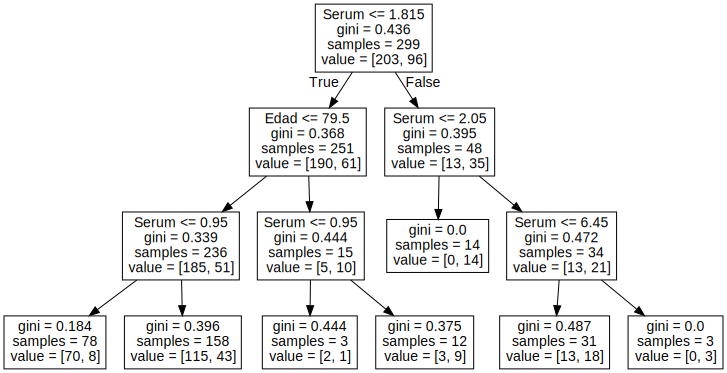

In [9]:
# O con la librería graphviz
import graphviz

# Export_graphviz
dot_data = tree.export_graphviz(
    arbol, out_file=None, feature_names=["Edad", "Serum", "Anemia"]
)
graph = graphviz.Source(dot_data)
graph

#05 Realizamos una predicción
Una vez el modelo está entrenado (definido) podemos pasarle datos para obtener las prediciones correspondientes de la variable objetivo.

Para esto utilizamos el método .[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict).

In [10]:
# Predicción
prediccion = arbol.predict(df_resumen[["Edad", "Serum", "Anemia"]])
prediccion

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Cómo de buena es la predicción?
from sklearn.metrics import accuracy_score

accuracy_score(df_resumen["Fallece"], prediccion)

0.7725752508361204

# 05 EJEMPLO
Entrenamos un árbol de decisión con todas las variables del set de datos de accidente cardiaco, y evaluamos si la predicción es mejor o peor que utilizando tres variables.

In [12]:
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [13]:
# Inicializamos un árbol. Por ahora está vacío. Solo definimos cómo queremos que sea.
arbol_grande = tree.DecisionTreeClassifier(max_depth=6)

In [14]:
# Matrices de datos
cols = [
    "age",
    "anaemia",
    "creatinine_phosphokinase",
    "diabetes",
    "ejection_fraction",
    "high_blood_pressure",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "sex",
    "smoking",
]
X = df[cols]
y = df["DEATH_EVENT"]

In [15]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
# No utilizamos la variable Time porque da información del target
# (no la conoceríamos a la hora de hacer una predicción del futuro)

arbol_grande = arbol_grande.fit(X=X, y=y)
arbol_grande

DecisionTreeClassifier(max_depth=6)

In [16]:
# Podemos visualizar la estructura
print(tree.export_text(arbol_grande, feature_names=list(df.iloc[:, :-2].columns)))

|--- serum_creatinine <= 1.81
|   |--- ejection_fraction <= 27.50
|   |   |--- serum_sodium <= 143.00
|   |   |   |--- creatinine_phosphokinase <= 685.50
|   |   |   |   |--- platelets <= 275000.00
|   |   |   |   |   |--- age <= 58.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  58.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- platelets >  275000.00
|   |   |   |   |   |--- serum_sodium <= 138.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- serum_sodium >  138.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- creatinine_phosphokinase >  685.50
|   |   |   |   |--- class: 1
|   |   |--- serum_sodium >  143.00
|   |   |   |--- class: 0
|   |--- ejection_fraction >  27.50
|   |   |--- age <= 79.50
|   |   |   |--- serum_creatinine <= 1.45
|   |   |   |   |--- creatinine_phosphokinase <= 6535.00
|   |   |   |   |   |--- platelets <= 332000.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- platelets >  33200

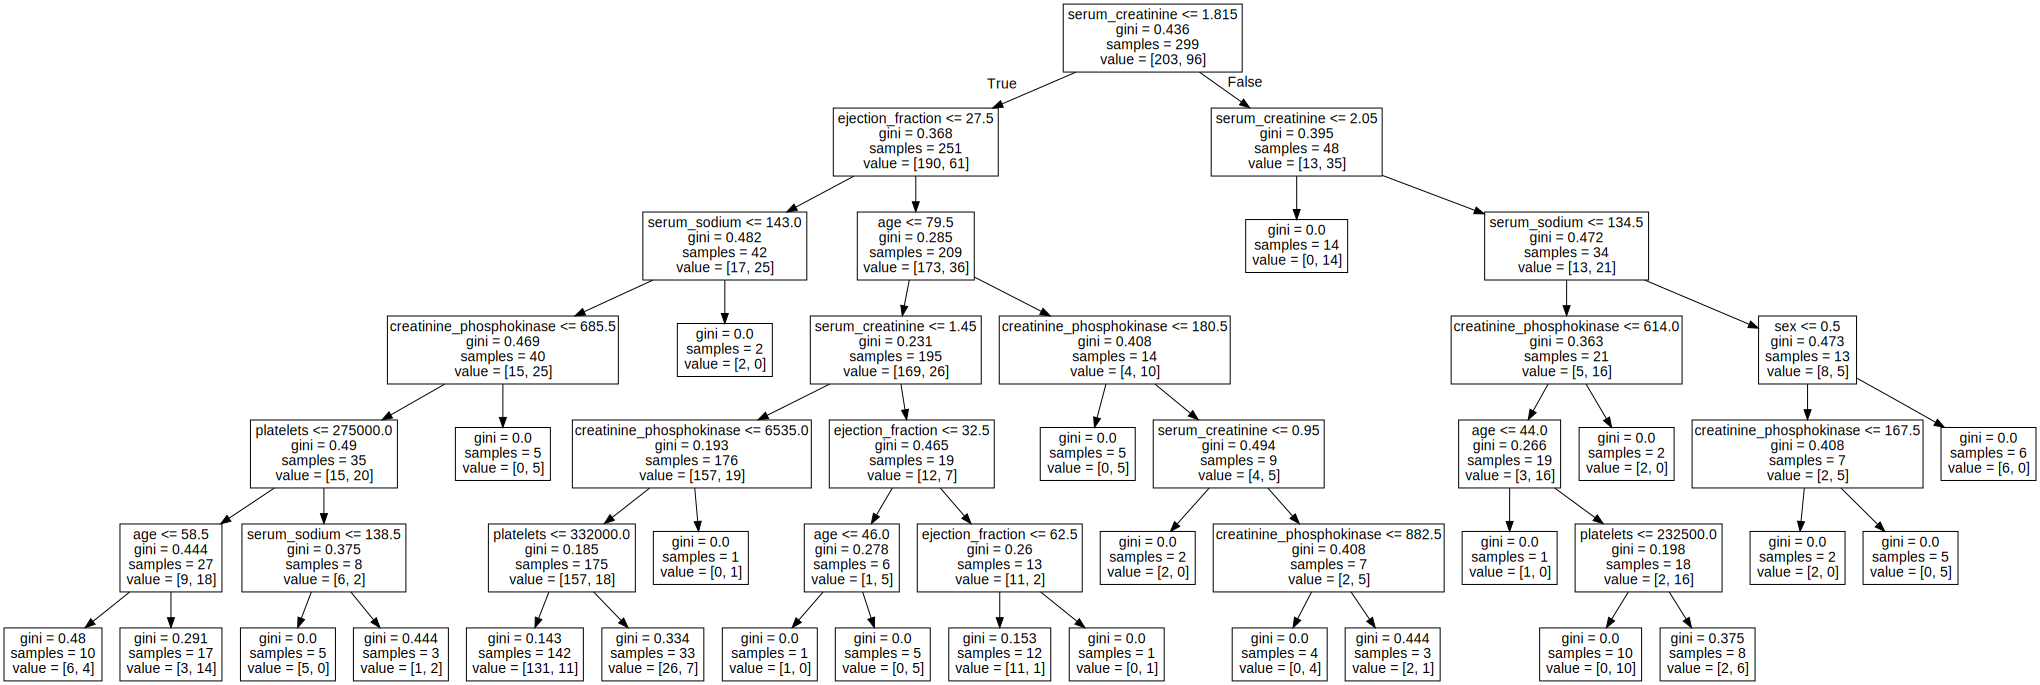

In [17]:
import graphviz

dot_data = tree.export_graphviz(
    arbol_grande, out_file=None, feature_names=list(X.columns)
)
graph = graphviz.Source(dot_data)
graph

In [18]:
# Predicción
prediccion = arbol_grande.predict(X)
prediccion

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# Precisión de la predicción
accuracy_score(y, prediccion)

0.8996655518394648

# 06 EJERCICIO TITANIC
Vamos a hacer un árbol de decisión que prediga si alguien fallece o no.

Para ello utilizaremos un dataset previamente transformado, ya listo para entrenar un árbol. En la próxima clase veremos por qué el dataset tiene que estar en un formato determinado y cómo conseguirlo.

In [20]:
# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree
import pandas as pd
import graphviz

## 0601 Importa el dataset
Puedes encontrarlo en mi github. Este es el link al archivo raw: [https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/titanic_limpio.csv](https://)

Importa los datos en un dataframe llamado **dataframe df_titanic**.

In [21]:
# Url archivo raw
url = "https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/titanic_limpio.csv"

# Importa csv
df_titanic = pd.read_csv(url)

# Visualización primeras filas
df_titanic.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,7.2500,22.0,0,0,1
1,1,1,0,1,0,71.2833,38.0,1,0,0


In [22]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## 0602 Crea el árbol de decisión
Utiliza una profundidad de 6 capas.

In [23]:
# Crea una lista con las variables que vamos a utilizar para predecir:
# ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
lista = [
    "Pclass",
    "Sex",
    "SibSp",
    "Parch",
    "Fare",
    "Age",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S",
]

X = df_titanic[lista]
y = df_titanic["Survived"]

In [24]:
# Inicializamos un árbol definiendo la profundidad
arbol_titanic = tree.DecisionTreeClassifier(
    max_depth=10, min_samples_split=15, min_samples_leaf=7
)

In [25]:
# Entrena el árbol con los datos del Titanic
arbol_titanic.fit(X=X, y=y)
arbol_titanic

DecisionTreeClassifier(max_depth=10, min_samples_leaf=7, min_samples_split=15)

## 0603 Visualiza el árbol
Qué variables utiliza el árbol para inferir el riesgo de muerte? Tiene sentido?

In [26]:
# con export_test
# Podemos visualizar la estructura
print(tree.export_text(arbol_titanic, feature_names=list(X.columns)))

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Fare <= 28.86
|   |   |   |--- Age <= 37.00
|   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  27.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  37.00
|   |   |   |   |--- Fare <= 14.62
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  14.62
|   |   |   |   |   |--- class: 1
|   |   |--- Fare >  28.86
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- Fare <= 135.78
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  135.78
|   |   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Embarked_S <= 0.50
|   |   |   |   |   |--- Fare <= 15.62
|   |   |   |   |   |   |--- Fare <= 13.94
|   |   |   |   | 

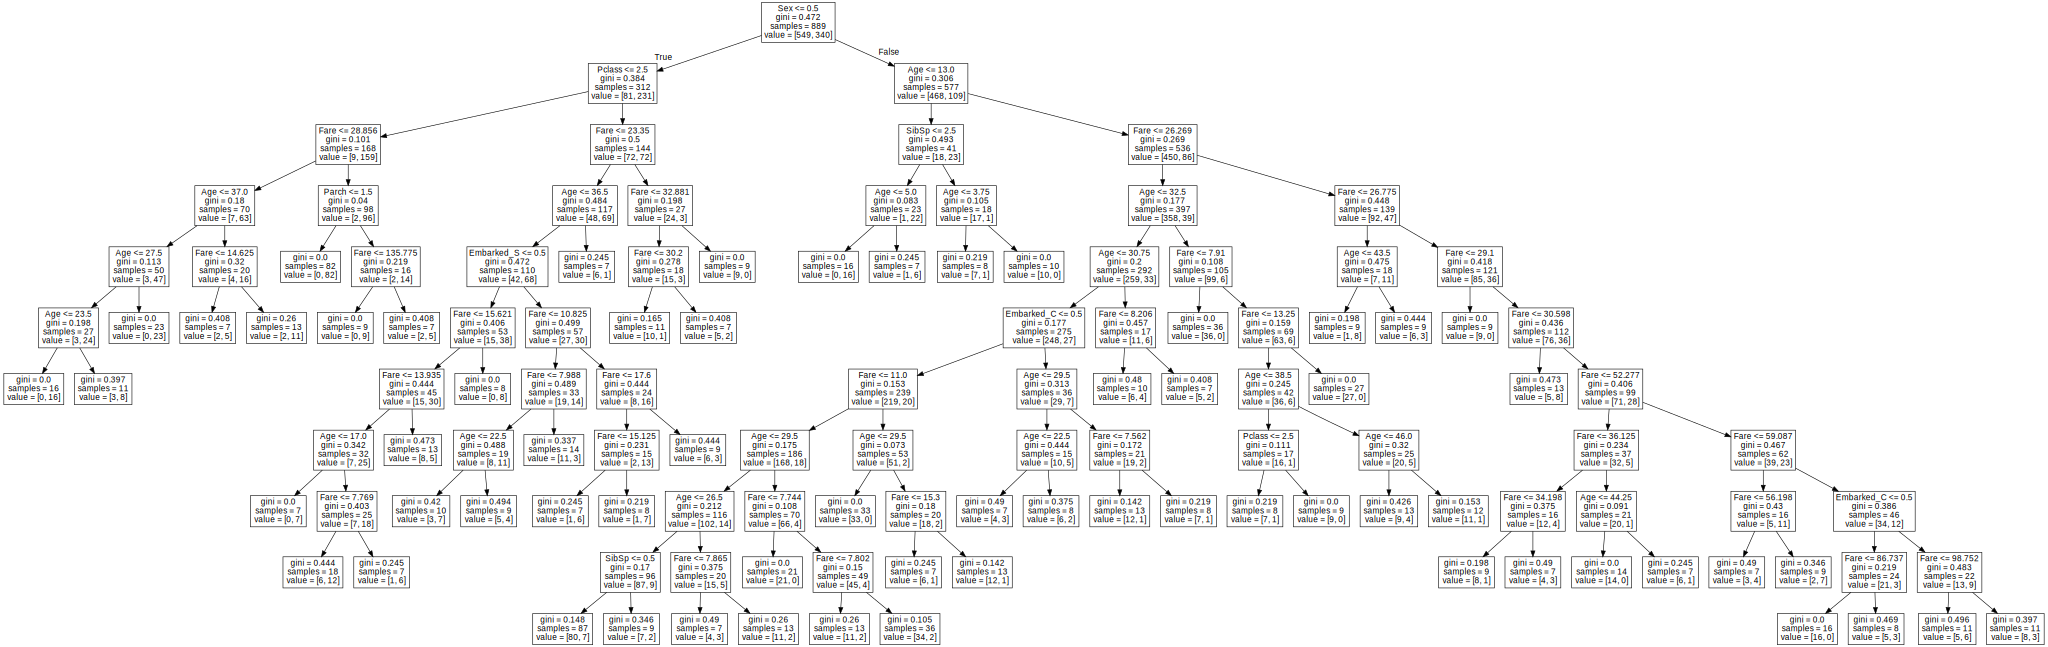

In [27]:
# con export_graphviz
dot_data = tree.export_graphviz(
    arbol_titanic, out_file=None, feature_names=list(X.columns)
)
graph = graphviz.Source(dot_data)
graph

## 0604 Realiza una predicción
Realiza una predicción con tu árbol y comprueba cuánto ha acertado.

In [28]:
# Predicción
prediccion = arbol_titanic.predict(X)

In [29]:
# Precisión de la predicción
accuracy_score(y, prediccion)

0.875140607424072